![logo](./figures/LogoLine_horizon_C3S.png)

# Customized regions

This notebook reproduces the functionalities of the C3S Atlas (https://atlas.climate.copernicus.eu/atlas) for data masking based on customized_regions. This functionality is particularly useful for selecting and analyzing specific geographical areas within the data. The customized_regions function supports five types of regions:

- 1. **User-defined regions**: These are custom regions defined by the user based on specific criteria or geographic boundaries.
- 2. **AR6 regions**: These are regions defined by the IPCC AR6 WG1, used for climate research and analysis ([Iturbide et al. 2020](https://doi.org/10.5194/essd-12-2959-2020)).
- 3. **European countries**: This includes masks for individual European countries, allowing for detailed country-level analysis.
- 4. **EUCRA regions**: These are regions defined by the European Climate Assessment & Dataset project.
- 5. **GeoJSON files**: Custom regions can also be defined using GeoJSON files, which allows for highly customizable geographic boundaries based on external data sources.

 Throughout this notebook, we will explore how to create and apply these masks to your datasets, enabling targeted and region-specific data analysis.

### Load Python packages and clone and install the c3s-atlas GitHub repository from the ecmwf-projects

Clone (`git clone`) the [C3S-atlas](https://github.com/ecmwf-projects/c3s-atlas) repository and install them (`pip install -e .`).

Further details on how to clone and install the repository are available in the [requirements section](http://localhost:8889/lab/tree/book/_build/html/intro.html)

In [1]:
import os
import xarray as xr
from pathlib import Path
import cdsapi
import requests, zipfile, io

from c3s_atlas.utils import (
    extract_zip_and_delete,
)
from c3s_atlas.customized_regions import (
    Mask
)

### Download climate data with the CDS API

To reduce data size and download time, a geographical subset focusing on the European region is selected.

- Catalogue: [Copernicus Interactive Climate Atlas: gridded monthly dataset](https://cds.climate.copernicus.eu/datasets/multi-origin-c3s-atlas?tab=overview)
- [How to use the CDS API](https://cds.climate.copernicus.eu/how-to-api)

In [3]:
project = "ERA5"
var = 't'
trend_period = period = slice('1991','2020')

In [4]:
dest = Path('./data/ERA5')
os.makedirs(dest, exist_ok=True)

In [ ]:
filename = 't_ERA5_mon_194001-202212.zip'

dataset = "multi-origin-c3s-atlas"
request = {
    'origin': 'era5',
    'domain': 'global',
    'variable': 'monthly_mean_of_daily_mean_temperature',
    'area': [35, -25, 72, 65], # Europe
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(dest / filename)
extract_zip_and_delete(dest / filename) 

In [5]:
ds = xr.open_dataset(dest / "t_ERA5_mon_194001-202212.nc")
# Select firs time step for faster results
ds = ds.isel(time=0)

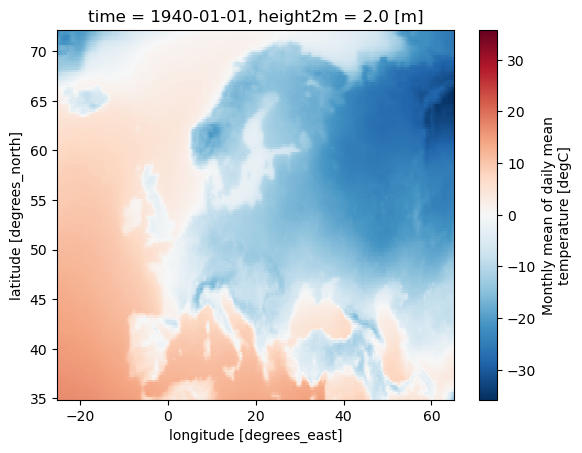

In [6]:
ds['t'].plot()

#### Generate and apply a mask for the user-defined region.

In [7]:
# Define a triangle mask using coordinates
mask_polygon = Mask(ds).polygon([[-20, 40], [20, 40], [0, 55]])

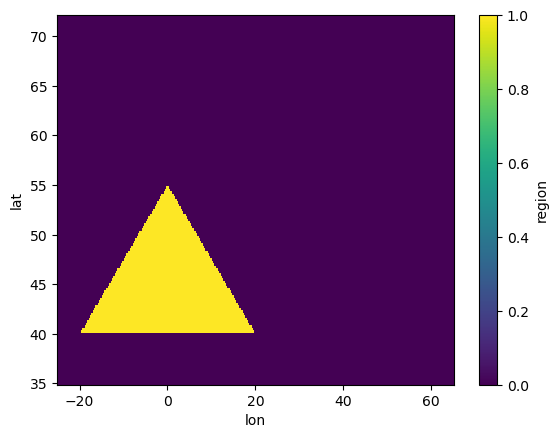

In [8]:
mask_polygon.plot()

In [9]:
# Mask the dataset (ds) based on the polygon mask (mask_polygon)
ds_masked_polygon = ds.where(mask_polygon)

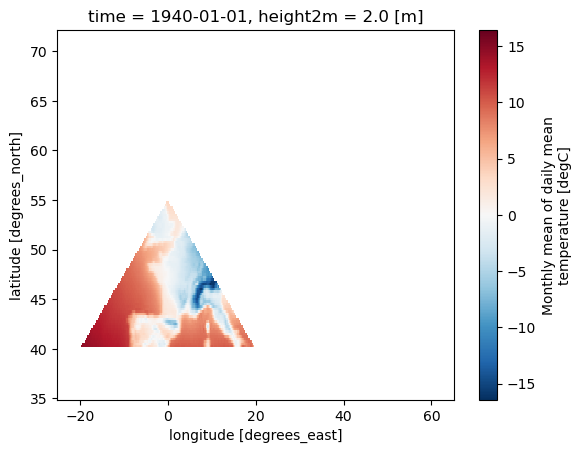

In [10]:
# Plot the masked dataset (ds_masked_polygon)
ds_masked_polygon[var].plot()

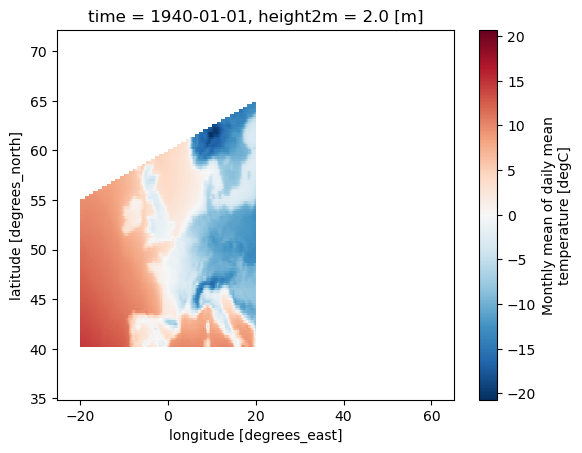

In [11]:
# Define a square mask using coordinates (order matters)
mask_polygon = Mask(ds).polygon([[-20, 40], [20, 40], [20, 65], [-20, 55]])
ds_masked_polygon = ds.where(mask_polygon)
ds_masked_polygon[var].plot()

#### Generate and apply a mask for the AR6-regions.

In [12]:
# Create a mask for a specific AR6 region (MED in this case)
mask_AR6 = Mask(ds).regions_AR6(['MED'])

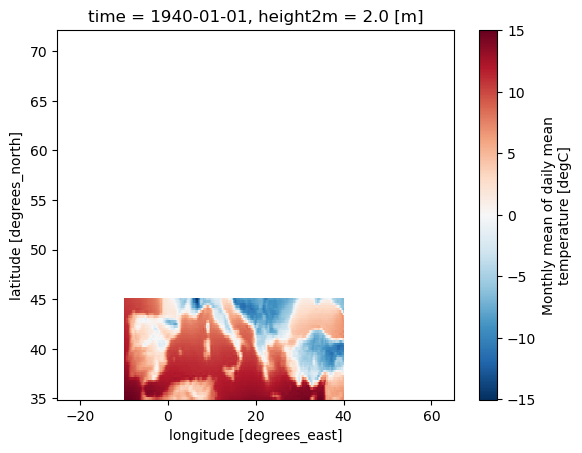

In [13]:
# Mask the dataset (ds) based on the AR6 region mask (mask_AR6)
ds_masked_AR6 = ds.where(mask_AR6)

# Plot the masked dataset for the AR6 region (ds_masked_AR6)
ds_masked_AR6[var].plot()

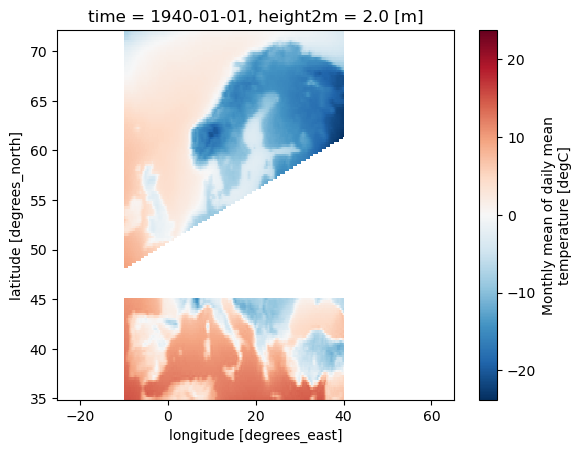

In [14]:
# Define a mask for AR6 regions using a list of region names
mask_AR6 = Mask(ds).regions_AR6(['MED','SAH','NEU'])
ds_masked_AR6 = ds.where(mask_AR6)
ds_masked_AR6[var].plot()

#### Generate and apply a mask for the European countries.

In [15]:
# Define a mask for European countries using a list (including only España)
mask_EUR = Mask(ds).European_contries(['ESP'])

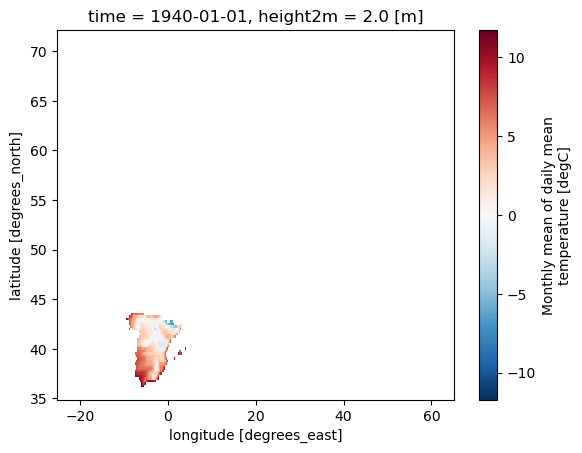

In [16]:
# Mask the dataset (ds) based on the European countries mask (mask_EUR)
ds_masked_EUR = ds.where(mask_EUR)

# Plot the masked dataset for the European countries (ds_masked_EUR)
ds_masked_EUR[var].plot()

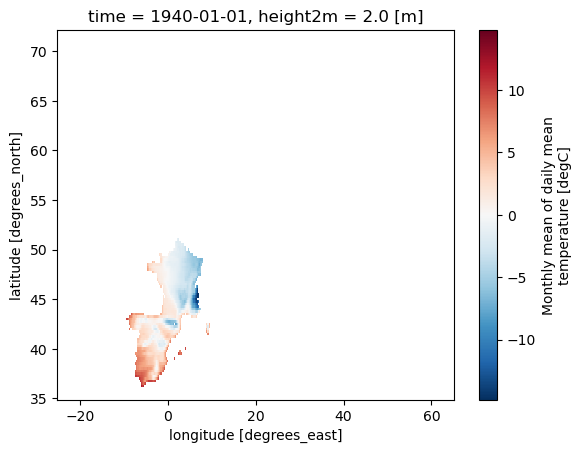

In [17]:
# Define a mask for European countries using a list of country abbreviations
mask_EUR = Mask(ds).European_contries(['ESP','FRA'])
ds_masked_EUR = ds.where(mask_EUR)
ds_masked_EUR[var].plot()

#### Generate and apply a mask for the EUCRA regions.

In [18]:
# Define a mask for EUCRA areas using a list 
mask_EUCRA = Mask(ds).EUCRA_contries(['ST'])

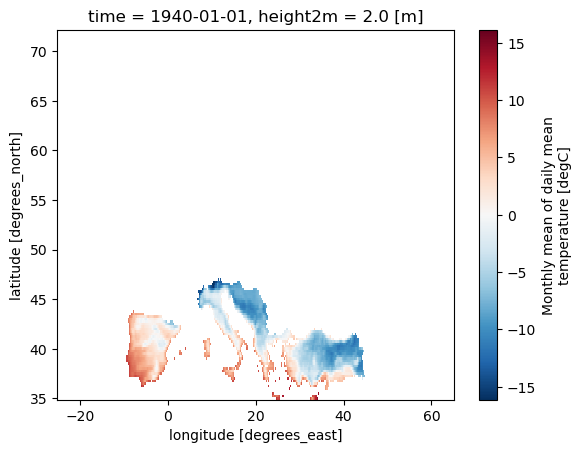

In [19]:
# Mask the dataset (ds) based on the EUCRA countries mask (mask_EUCRA)
ds_masked_EUCRA = ds.where(mask_EUCRA)

# Plot the masked dataset for the EUCRA countries (ds_masked_EUCRA)
ds_masked_EUCRA[var].plot()

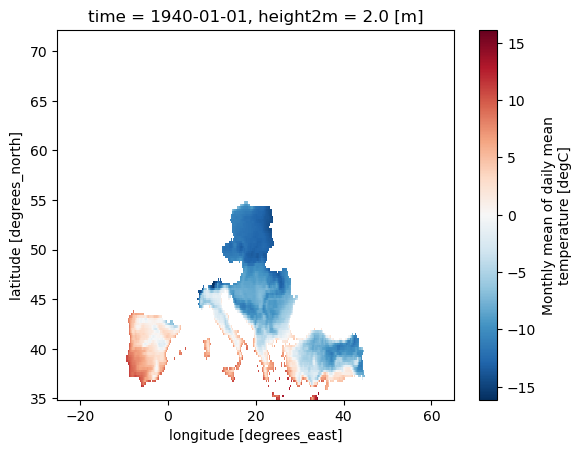

In [20]:
# Define a mask for EUCRA countries using a list of abbreviations
mask_EUCRA = Mask(ds).EUCRA_contries(['ST', 'CT'])
ds_masked_EUCRA = ds.where(mask_EUCRA)
ds_masked_EUCRA[var].plot()

### Download climate data with the CDS API
- Catalogue: [ERA5 monthly averaged data on single levels from 1940 to present](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=overview)

- [How to use the CDS API](https://cds.climate.copernicus.eu/how-to-api)

In [29]:
project = "ERA5"
var = 't'
trend_period = period = slice('1991','2020')

In [30]:
dest = Path('./data/ERA5')
os.makedirs(dest, exist_ok=True)

In [ ]:
filename = 't_ERA5_mon_194001-202212.zip'

dataset = "multi-origin-c3s-atlas"
request = {
    'origin': 'era5',
    'domain': 'global',
    'variable': 'monthly_mean_of_daily_mean_temperature',
    'area': [20, -150, 60, 67], # USA
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(dest / filename)
extract_zip_and_delete(dest / filename) 

In [32]:
ds = xr.open_dataset(dest / "t_ERA5_mon_194001-202212.nc")
# Select firs time step for faster results
ds = ds.isel(time=0)

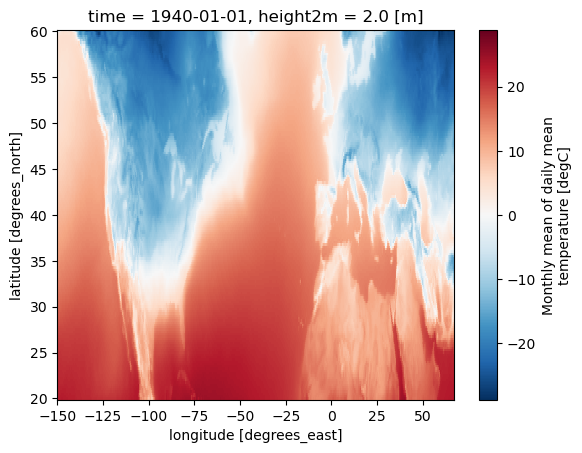

In [33]:
ds['t'].plot()

#### Generate and apply a mask from a different GeoJSON.

In [34]:
zip_url = "https://download2.exploratory.io/maps/states.zip"
r = requests.get(zip_url)
zip_file = io.BytesIO(r.content)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./geojsons/")

In [35]:
# Define a mask using a GeoJSON file and names
mask_json = Mask(ds).regions_geojson('./geojsons/states.geojson', "NAME", ["Nebraska", "Indiana", "Texas"])

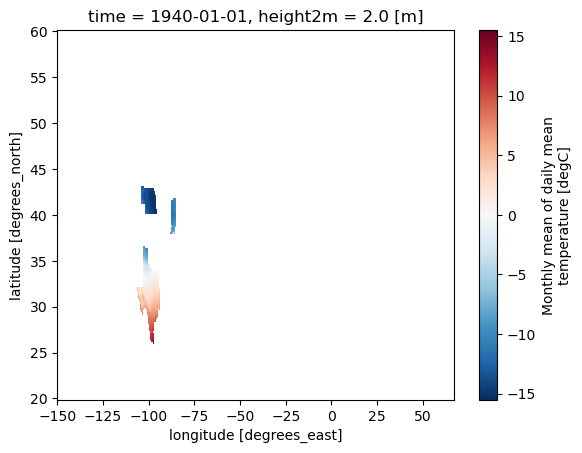

In [36]:
# Mask the dataset (ds) based on the US states mask (mask_json)
ds_masked_json = ds.where(mask_json)

# Plot the masked dataset for the US states (ds_masked_json)
ds_masked_json[var].plot()